# Supporting plots

/Users/songshgeo/Documents/VSCode/shifting_baseline/.venv/lib/python3.11/site-packages/matplotlib/transforms.py:351: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


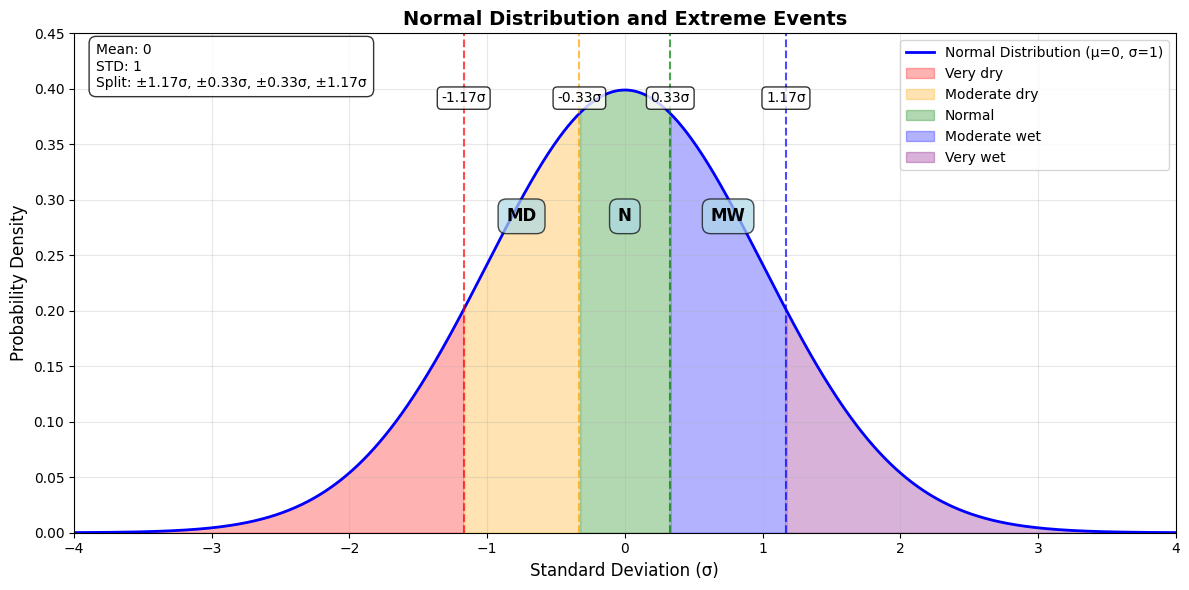

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from shifting_baseline.constants import THRESHOLDS, TICK_LABELS, VERBOSE_LABELS


def plot_normal_with_thresholds(
    thresholds=THRESHOLDS,
    levels=VERBOSE_LABELS,
    tick_labels=TICK_LABELS,
    mu=0,
    sigma=1,
    figsize=(12, 6),
):
    """Plot normal distribution with thresholds and region labels.

    Args:
        thresholds: List of split points (e.g., [-1.17, -0.33, 0.33, 1.17])
        levels: List of region names (e.g., ["SW", "MW", "N", "MD", "SD"])
        tick_labels: List of region labels for display
        mu: Mean of the normal distribution
        sigma: Standard deviation
        figsize: Figure size
    """
    # Define colors for each region
    colors = ["red", "orange", "green", "blue", "purple"]

    x = np.linspace(-4, 4, 1000)
    y = norm.pdf(x, mu, sigma)

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(x, y, "b-", linewidth=2, label=f"Normal Distribution (μ={mu}, σ={sigma})")

    # Draw vertical lines for thresholds
    for point, color in zip(thresholds, colors):
        ax.axvline(x=point, color=color, linestyle="--", alpha=0.7, linewidth=1.5)
        ax.text(
            point,
            ax.get_ylim()[1] * 0.95,
            f"{point:.2f}σ",
            ha="center",
            va="top",
            fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
        )

    # Fill regions
    region_edges = [-np.inf] + thresholds + [np.inf]
    for i in range(len(levels)):
        mask = (x > region_edges[i]) & (x <= region_edges[i + 1])
        ax.fill_between(x, y, where=mask, alpha=0.3, color=colors[i], label=levels[i])

    # Add region labels
    region_centers = [
        (region_edges[i] + region_edges[i + 1]) / 2 for i in range(len(levels))
    ]
    for x_pos, label in zip(region_centers, tick_labels):
        ax.text(
            x_pos,
            ax.get_ylim()[1] * 0.7,
            label,
            ha="center",
            va="top",
            fontsize=12,
            fontweight="bold",
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.7),
        )

    ax.set_xlabel("Standard Deviation (σ)", fontsize=12)
    ax.set_ylabel("Probability Density", fontsize=12)
    ax.set_title(
        "Normal Distribution and Extreme Events", fontsize=14, fontweight="bold"
    )
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-4, 4)
    ax.set_ylim(0, 0.45)
    ax.legend(loc="upper right", fontsize=10)

    stats_text = f"Mean: {mu}\nSTD: {sigma}\nSplit: {', '.join([f'±{abs(t):.2f}σ' for t in thresholds])}"
    ax.text(
        0.02,
        0.98,
        stats_text,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8),
    )

    plt.tight_layout()
    plt.show()


# 用法
plot_normal_with_thresholds()

f(0) = 0.200
f(0.1) = 0.800


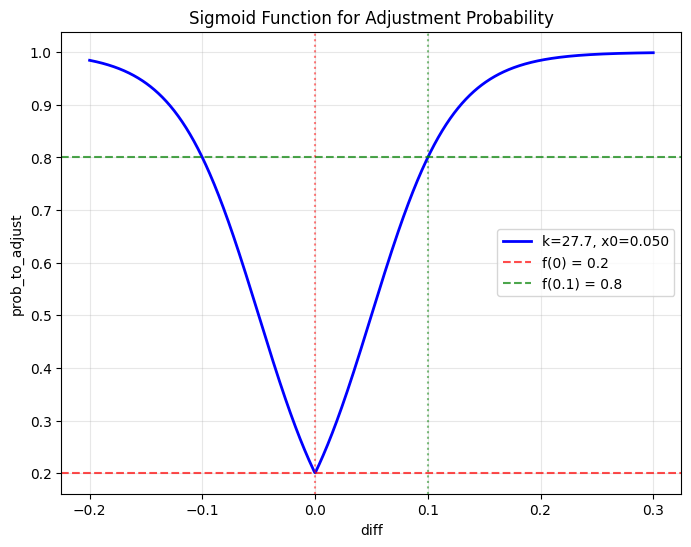

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 计算参数
k = 27.72
x0 = 0.05


# 验证
def sigmoid(x, k, x0):
    return 1 / (1 + np.exp(-k * (np.abs(x) - x0)))


print(f"f(0) = {sigmoid(0, k, x0):.3f}")  # 应该接近 0.2
print(f"f(0.1) = {sigmoid(0.1, k, x0):.3f}")  # 应该接近 0.8

# 可视化
x = np.linspace(-0.2, 0.3, 1000)
y = sigmoid(x, k, x0)

plt.figure(figsize=(8, 6))
plt.plot(x, y, "b-", linewidth=2, label=f"k={k:.1f}, x0={x0:.3f}")
plt.axhline(0.2, color="r", linestyle="--", alpha=0.7, label="f(0) = 0.2")
plt.axhline(0.8, color="g", linestyle="--", alpha=0.7, label="f(0.1) = 0.8")
plt.axvline(0, color="r", linestyle=":", alpha=0.5)
plt.axvline(0.1, color="g", linestyle=":", alpha=0.5)
plt.xlabel("diff")
plt.ylabel("prob_to_adjust")
plt.title("Sigmoid Function for Adjustment Probability")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

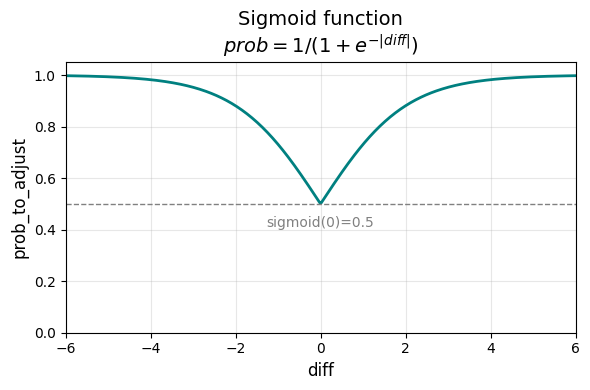

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 diff 范围
diff = np.linspace(-6, 6, 400)
prob_to_adjust = 1 / (1 + np.exp(-np.abs(diff)))

plt.figure(figsize=(6, 4))
plt.plot(diff, prob_to_adjust, color="teal", lw=2)
plt.xlabel("diff", fontsize=12)
plt.ylabel("prob_to_adjust", fontsize=12)
plt.title("Sigmoid function\n$prob = 1/(1+e^{-|diff|})$", fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05)
plt.xlim(-6, 6)
plt.axhline(0.5, color="gray", linestyle="--", lw=1)
plt.text(0, 0.40, "sigmoid(0)=0.5", ha="center", va="bottom", fontsize=10, color="gray")
plt.tight_layout()
plt.show();

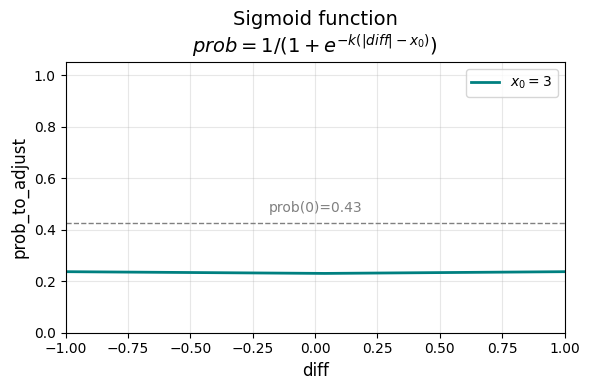

In [24]:
import numpy as np
import matplotlib.pyplot as plt

diff = np.linspace(-1, 1, 400)
k = 0.1
x0 = 3  # 控制diff=0时的概率
prob_to_adjust = 1 / (3 + np.exp(-k * (np.abs(diff) - x0)))

plt.figure(figsize=(6, 4))
plt.plot(diff, prob_to_adjust, color="teal", lw=2, label=f"$x_0={x0}$")
plt.xlabel("diff", fontsize=12)
plt.ylabel("prob_to_adjust", fontsize=12)
plt.title("Sigmoid function\n$prob = 1/(1+e^{-k(|diff|-x_0)})$", fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05)
plt.xlim(-1, 1)
plt.axhline(1 / (1 + np.exp(k * x0)), color="gray", linestyle="--", lw=1)
plt.text(
    0,
    1 / (1 + np.exp(k * x0)) + 0.03,
    f"prob(0)={1/(1+np.exp(k*x0)):.2f}",
    ha="center",
    va="bottom",
    fontsize=10,
    color="gray",
)
plt.legend()
plt.tight_layout()
plt.show();

## 记异略常

这个函数是主体的【记异略常】原则的实现。

当事件发生时，主体会根据事件的极端程度，以及自己的记忆，来决定是否记录该事件。如果事件越极端，主体记录该事件的概率越大。我们使用正态分布的生存函数（1-CDF）来计算事件发生的概率。当事件的极端程度为0时，主体记录该事件的概率为0.5。当事件的极端程度越大，主体记录该事件的概率越接近1。由两个参数控制：

- scale：事件的极端程度的尺度。越大，事件被记录的概率越小。
- f0：事件被记录的基准概率。越大，事件被记录的概率越大。

当事件的极端程度为0时，主体记录该事件的概率为0.5 + f0。当事件的极端程度越大，主体记录该事件的概率越接近1。












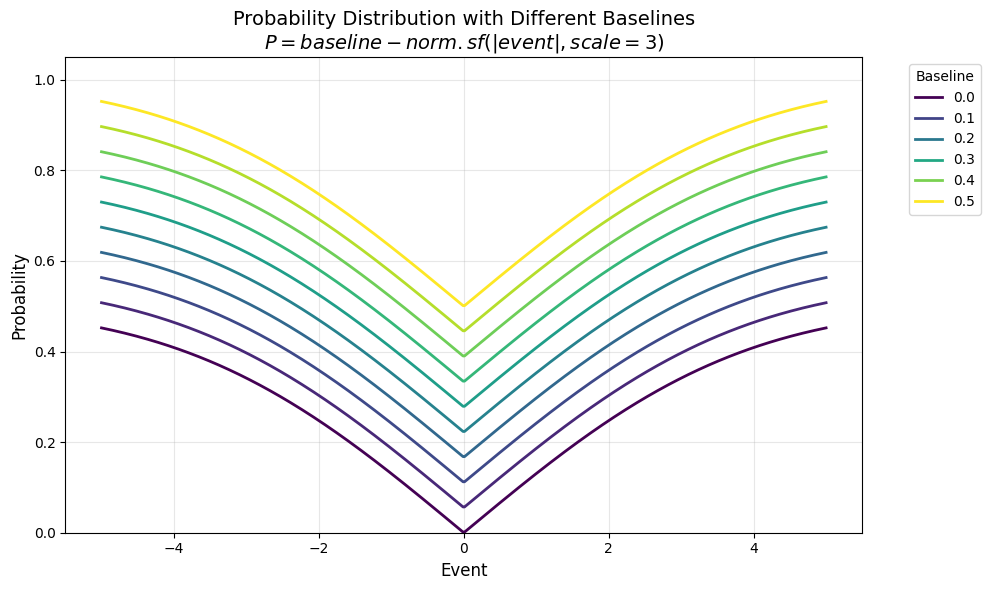

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 生成数据
events = np.linspace(-5, 5, 500)
baselines = np.linspace(0, 0.5, 10)

# 创建数据框
data = []
for baseline in baselines:
    for event in events:
        prob = 0.5 + baseline - norm.sf(np.abs(event), scale=3)
        data.append({"event": event, "baseline": baseline, "probability": prob})

df = pd.DataFrame(data)

# 使用 seaborn 绘制
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df, x="event", y="probability", hue="baseline", palette="viridis", linewidth=2
)

plt.xlabel("Event", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.title(
    "Probability Distribution with Different Baselines\n$P = baseline - norm.sf(|event|, scale=3)$",
    fontsize=14,
)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05)

# 添加图例
plt.legend(title="Baseline", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

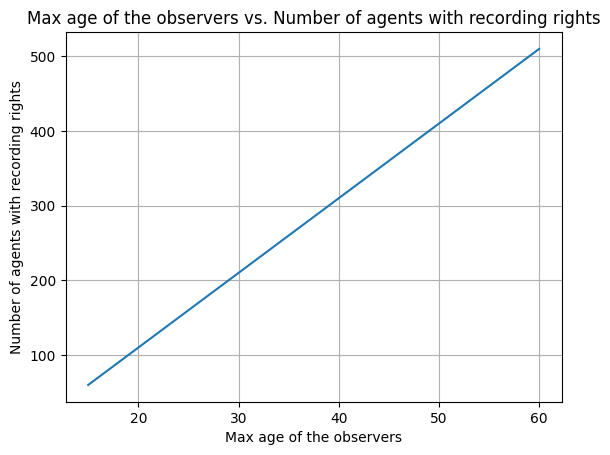

In [39]:
import numpy as np
import matplotlib.pyplot as plt

N = 10  # 每年新出生的 agent 数量
A_min = 10  # 记录年龄
A_max = np.arange(15, 61)  # 死亡年龄从15到60

num_agents = N * (A_max - A_min + 1)
plt.plot(A_max, num_agents)
plt.xlabel("Max age of the observers")
plt.ylabel("Number of agents with recording rights")
plt.title("Max age of the observers vs. Number of agents with recording rights")
plt.grid(True)
plt.show()